https://realpython.com/linear-regression-in-python/

In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import mplfinance as mpf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from src import tests_utils as u

## Get the data

In [3]:
df = pd.read_csv('../../data/binance_BTCUSDT_1m_from_2020_01_01_to_2021_12_31_candlesticks_signals_raw.csv')

In [4]:
df.index = pd.DatetimeIndex(df['formatted_open_time'])

In [5]:
df.columns.values

array(['open_time', 'open', 'high', 'low', 'close', 'volume',
       'close_time', 'quote_asset_volumne', 'number_of_trades',
       'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volumne',
       'ignore', 'formatted_open_time', 'formatted_close_time',
       'upper_shadow', 'lower_shadow', 'real_body', 'CDLINVERTEDHAMMER',
       'CDLHAMMER', 'CDLPIERCING', 'CDLMORNINGSTAR', 'CDLSHOOTINGSTAR',
       'CDLHANGINGMAN', 'CDLDARKCLOUDCOVER', 'CDLEVENINGSTAR'],
      dtype=object)

## Select a particular candlestick patterns type to analyse

In [124]:
df[df['CDLSHOOTINGSTAR'] == -100]

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,lower_shadow,real_body,CDLINVERTEDHAMMER,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 01:51:00,1577843460000,7205.24,7205.31,7205.04,7205.26,16.023105,1577843519999,1.154507e+05,73,12.365266,...,0.20,0.02,0,100,0,0,-100,-100,0,0
2020-01-01 02:06:00,1577844360000,7218.60,7221.32,7218.60,7219.03,4.323330,1577844419999,3.121500e+04,57,0.849059,...,0.00,0.43,0,0,0,0,-100,0,0,0
2020-01-01 02:52:00,1577847120000,7238.00,7240.76,7237.64,7238.76,21.439908,1577847179999,1.552011e+05,220,14.497286,...,0.36,0.76,0,0,0,0,-100,0,0,0
2020-01-01 06:04:00,1577858640000,7225.55,7228.31,7225.50,7226.84,4.430895,1577858699999,3.202228e+04,202,2.464885,...,0.05,1.29,0,0,0,0,-100,0,0,0
2020-01-01 06:14:00,1577859240000,7229.33,7230.00,7229.18,7229.31,6.391835,1577859299999,4.621049e+04,155,1.392283,...,0.13,0.02,0,0,0,0,-100,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 14:21:00,1640874060000,47249.79,47286.50,47249.78,47254.82,21.404370,1640874119999,1.011660e+06,616,12.660600,...,0.01,5.03,0,0,0,0,-100,0,0,0
2021-12-30 16:28:00,1640881680000,47238.77,47259.63,47238.76,47244.20,24.137770,1640881739999,1.140479e+06,519,16.994270,...,0.01,5.43,0,0,0,0,-100,0,0,0
2021-12-30 17:41:00,1640886060000,47574.19,47605.00,47570.84,47587.99,61.111970,1640886119999,2.908803e+06,529,11.174860,...,3.35,13.80,0,0,0,0,-100,0,0,0


## Given the candlestick pattern, select one event in particular

In [170]:
event_date = '2021-12-30 16:28:00'

In [171]:
idx = df.index.get_loc(event_date)

In [172]:
time_window_in_min = 50

In [173]:
df_temp = df.iloc[idx - time_window_in_min :idx + 1]
df_temp

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,lower_shadow,real_body,CDLINVERTEDHAMMER,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2021-12-30 15:38:00,1640878680000,47311.22,47311.23,47291.78,47292.93,11.43438,1640878739999,5.408194e+05,506,3.52305,...,1.15,18.29,0,0,0,0,0,0,0,0
2021-12-30 15:39:00,1640878740000,47292.94,47322.99,47292.93,47319.81,13.74483,1640878799999,6.503051e+05,471,5.55626,...,0.01,26.87,0,0,0,0,0,0,0,0
2021-12-30 15:40:00,1640878800000,47319.81,47369.69,47301.66,47362.78,17.43743,1640878859999,8.253546e+05,516,12.28011,...,18.15,42.97,0,0,0,0,0,0,0,0
2021-12-30 15:41:00,1640878860000,47362.78,47362.78,47312.44,47339.00,10.87939,1640878919999,5.149959e+05,542,4.64557,...,26.56,23.78,0,0,0,0,0,0,0,0
2021-12-30 15:42:00,1640878920000,47339.00,47350.00,47328.31,47330.81,10.49559,1640878979999,4.968781e+05,552,5.62693,...,2.50,8.19,0,0,0,0,0,0,0,0
2021-12-30 15:43:00,1640878980000,47330.82,47348.98,47304.07,47348.98,18.47895,1640879039999,8.744356e+05,604,8.98936,...,26.75,18.16,0,100,0,0,0,0,0,0
2021-12-30 15:44:00,1640879040000,47340.81,47348.98,47316.72,47326.63,11.74760,1640879099999,5.559914e+05,410,4.09041,...,9.91,14.18,0,0,0,0,0,0,0,0
2021-12-30 15:45:00,1640879100000,47326.63,47352.19,47326.63,47344.48,18.76346,1640879159999,8.882435e+05,581,9.47896,...,0.00,17.85,0,0,0,0,0,0,0,0
2021-12-30 15:46:00,1640879160000,47344.49,47347.39,47288.00,47288.01,16.32506,1640879219999,7.724613e+05,557,7.05558,...,0.01,56.48,0,0,0,0,0,0,0,0


In [174]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2021-12-30 15:38:00 to 2021-12-30 16:28:00
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   open_time                      51 non-null     int64  
 1   open                           51 non-null     float64
 2   high                           51 non-null     float64
 3   low                            51 non-null     float64
 4   close                          51 non-null     float64
 5   volume                         51 non-null     float64
 6   close_time                     51 non-null     int64  
 7   quote_asset_volumne            51 non-null     float64
 8   number_of_trades               51 non-null     int64  
 9   taker_buy_base_asset_volume    51 non-null     float64
 10  taker_buy_quote_asset_volumne  51 non-null     float64
 11  ignore                         51 non-null     int64  
 12  formatted_open

## Plot the event range

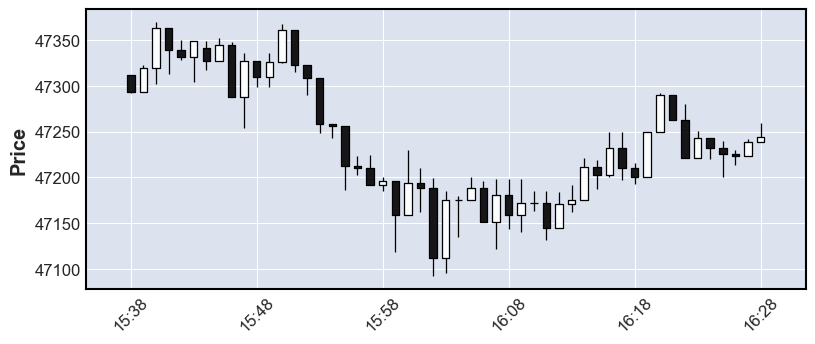

In [175]:
mpf.plot(df_temp, type='candle', figsize=(10,4))

## Do the linear regression of 'left' (multiples slopes of n bars)

### Left

In [176]:
df_slope_all = df_temp #.iloc[:-1] # cut out the reference date
df_slope_all

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,lower_shadow,real_body,CDLINVERTEDHAMMER,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2021-12-30 15:38:00,1640878680000,47311.22,47311.23,47291.78,47292.93,11.43438,1640878739999,5.408194e+05,506,3.52305,...,1.15,18.29,0,0,0,0,0,0,0,0
2021-12-30 15:39:00,1640878740000,47292.94,47322.99,47292.93,47319.81,13.74483,1640878799999,6.503051e+05,471,5.55626,...,0.01,26.87,0,0,0,0,0,0,0,0
2021-12-30 15:40:00,1640878800000,47319.81,47369.69,47301.66,47362.78,17.43743,1640878859999,8.253546e+05,516,12.28011,...,18.15,42.97,0,0,0,0,0,0,0,0
2021-12-30 15:41:00,1640878860000,47362.78,47362.78,47312.44,47339.00,10.87939,1640878919999,5.149959e+05,542,4.64557,...,26.56,23.78,0,0,0,0,0,0,0,0
2021-12-30 15:42:00,1640878920000,47339.00,47350.00,47328.31,47330.81,10.49559,1640878979999,4.968781e+05,552,5.62693,...,2.50,8.19,0,0,0,0,0,0,0,0
2021-12-30 15:43:00,1640878980000,47330.82,47348.98,47304.07,47348.98,18.47895,1640879039999,8.744356e+05,604,8.98936,...,26.75,18.16,0,100,0,0,0,0,0,0
2021-12-30 15:44:00,1640879040000,47340.81,47348.98,47316.72,47326.63,11.74760,1640879099999,5.559914e+05,410,4.09041,...,9.91,14.18,0,0,0,0,0,0,0,0
2021-12-30 15:45:00,1640879100000,47326.63,47352.19,47326.63,47344.48,18.76346,1640879159999,8.882435e+05,581,9.47896,...,0.00,17.85,0,0,0,0,0,0,0,0
2021-12-30 15:46:00,1640879160000,47344.49,47347.39,47288.00,47288.01,16.32506,1640879219999,7.724613e+05,557,7.05558,...,0.01,56.48,0,0,0,0,0,0,0,0


In [177]:
# list_coeficients = []
# list_x = []
# list_y = []
# list_y_pred = []
# for i in range(49,0,-7): # Loop from 49 to 0 moving in range of -7
#     df_slope_temp = df_slope_all[['open_time', 'close']].iloc[i-7:i]
#     x = df_slope_temp.open_time.values.reshape((-1,1))
#     y = df_slope_temp.close.values
#     model = LinearRegression()
#     model.fit(x, y)
#     list_coeficients.append(model.coef_[0])
#     y_pred = model.predict(x)

#     list_x.append(x)
#     list_y.append(y)
#     list_y_pred.append(y_pred)
    

In [178]:
# plt.figure(figsize=(10,4))

# for i in range(0,7):
#     x = list_x[i]
#     y = list_y[i]
#     y_pred = list_y_pred[i]

#     # plot lines
#     plt.scatter(x, y, label = "close price", color="black")
#     plt.scatter(x, y_pred, label = "regression")

# plt.show()

In [179]:
# mpf.plot(df_temp, type='candle', figsize=(10,4))

In [180]:
slope_size = 7

In [181]:
list_coeficients = []
list_x = []
list_y = []
list_y_pred = []
for i in range(time_window_in_min,slope_size-1,-1): # Loop from 49 to 0 moving in range of -1
    df_slope_temp = df_slope_all[['open_time', 'close']].iloc[i-slope_size:i]
    x = df_slope_temp.open_time.values.reshape((-1,1))
    y = df_slope_temp.close.values
    model = LinearRegression()
    model.fit(x, y)
    list_coeficients.append(model.coef_[0])
    y_pred = model.predict(x)

    list_x.append(x)
    list_y.append(y)
    list_y_pred.append(y_pred)
    

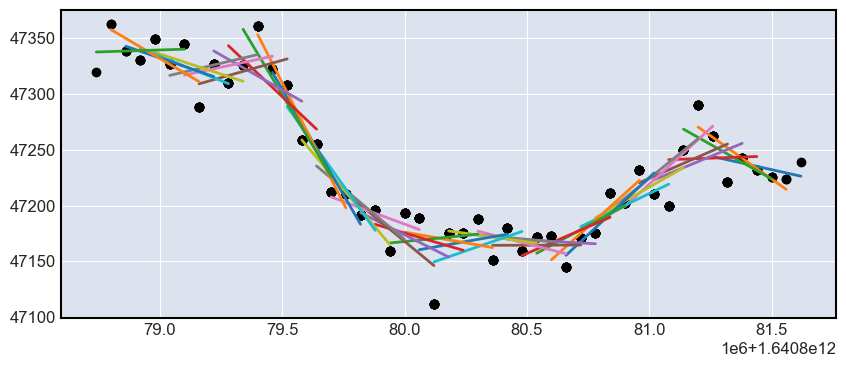

In [182]:
plt.figure(figsize=(10,4))

for i in range(0,time_window_in_min-slope_size):
    x = list_x[i]
    y = list_y[i]
    y_pred = list_y_pred[i]

    # plot lines
    plt.scatter(x, y, label = "close price", color="black")
    plt.plot(x, y_pred, label = "regression")

plt.show()

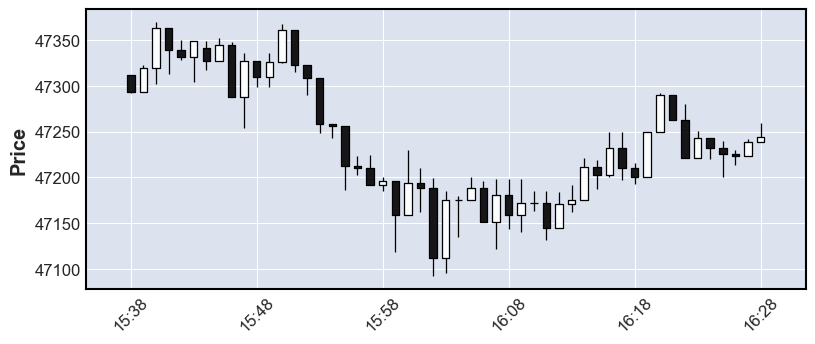

In [183]:
mpf.plot(df_temp, type='candle', figsize=(10,4))

In [184]:
print(list_coeficients)

[-4.8845238095236687e-05, -0.0001552916666666706, -0.00012401190476191132, 7.809523809521022e-06, 9.078571428572535e-05, 9.630952380953853e-05, 0.00020006547619048947, 0.0001782142857142952, 0.00012480357142857898, 0.00010585119047618284, 0.0002049166666666548, 0.00019783333333332065, 0.00011772023809522319, 9.53630952380817e-05, -1.187500000001126e-05, 6.845238095246782e-07, -5.616666666665836e-05, -1.9470238095224578e-05, -3.0440476190458518e-05, 7.580952380953284e-05, 3.877976190476275e-05, -3.847619047619444e-05, 2.1958333333319987e-05, -6.467261904763288e-05, -0.00011023809523810647, -0.00018055952380951733, -8.104166666666318e-05, -0.00018280357142856307, -0.0002606904761904713, -0.0003081428571428486, -0.0003778928571428531, -0.00043105357142857035, -0.0003664642857142834, -0.000207726190476188, -0.00012520238095237453, 6.206547619046992e-05, 4.692857142856502e-05, 5.195238095238025e-05, -7.200595238095741e-05, -8.755952380952724e-05, -7.54523809523778e-05, -0.000129482142857133

In [185]:
print(len(list_coeficients))
pos_count, neg_count = 0, 0
  
# iterating each number in list
for num in list_coeficients:
      
    # checking condition
    if num >= 0:
        pos_count += 1
  
    else:
        neg_count += 1

print("Positive numbers in the list: ", pos_count)
print("Negative numbers in the list: ", neg_count)

44
Positive numbers in the list:  20
Negative numbers in the list:  24


In [186]:
list_coeficients[0]

-4.8845238095236687e-05

In [187]:
np.percentile(list_coeficients, 70)

5.29636904761892e-05

In [188]:
#np.percentile(list_coeficients, 70) < list_coeficients[0]
import math

sign_recent_slope_coef = math.copysign(1,list_coeficients[0])
print(sign_recent_slope_coef)
sign_p70_all_slope_coef = math.copysign(1,np.percentile(list_coeficients, 70))
print(sign_p70_all_slope_coef)

sign_recent_slope_coef == sign_p70_all_slope_coef


-1.0
1.0


False

In [164]:
window_size = 50
slope_size = 7

In [144]:
list_dates_invertedhammer = df[df['CDLINVERTEDHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_hammer = df[df['CDLHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_piercing = df[df['CDLPIERCING'] == 100]['formatted_open_time'].to_list()
list_dates_morningstar = df[df['CDLMORNINGSTAR'] == 100]['formatted_open_time'].to_list()

In [145]:
print(len(list_dates_invertedhammer))
list_validate_dates_invertedhammer = []
for date in list_dates_invertedhammer:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_invertedhammer.append(date)
print(len(list_validate_dates_invertedhammer))        

7061


KeyboardInterrupt: 

In [99]:
print(len(list_dates_hammer))
list_validate_dates_hammer = []
for date in list_dates_hammer:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_hammer.append(date)
print(len(list_validate_dates_hammer))          

34556
1390


In [100]:
list_validate_dates_hammer[0]

'2020-01-02 11:32:00'

In [117]:
print(len(list_dates_piercing))
list_validate_dates_piercing = []
for date in list_dates_piercing:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_piercing.append(date)
print(len(list_validate_dates_piercing))        

282
10


In [118]:
print(len(list_dates_morningstar))
list_validate_dates_morningstar = []
for date in list_dates_morningstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_morningstar.append(date)
print(len(list_validate_dates_morningstar))

3546
234


In [119]:
list_dates_shootingstar = df[df['CDLSHOOTINGSTAR'] == -100]['formatted_open_time'].to_list()
list_dates_hangingman = df[df['CDLHANGINGMAN'] == -100]['formatted_open_time'].to_list()
list_dates_darkcloudcover = df[df['CDLDARKCLOUDCOVER'] == -100]['formatted_open_time'].to_list()
list_dates_eveningstar = df[df['CDLEVENINGSTAR'] == -100]['formatted_open_time'].to_list()

In [120]:
print(len(list_dates_shootingstar))
list_validate_dates_shootingstar = []
for date in list_dates_shootingstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_shootingstar.append(date)     
print(len(list_validate_dates_shootingstar))        

8400
3732


In [121]:
print(len(list_dates_hangingman))
list_validate_dates_hangingman = []
for date in list_dates_hangingman:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_hangingman.append(date)
print(len(list_validate_dates_hangingman))        

22099
10885


In [122]:
print(len(list_dates_darkcloudcover))
list_validate_dates_darkcloudcover = []
for date in list_dates_darkcloudcover:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_darkcloudcover.append(date)
print(len(list_validate_dates_darkcloudcover))        

427
192


In [123]:
print(len(list_dates_eveningstar))
list_validate_dates_eveningstar = []
for date in list_dates_eveningstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_eveningstar.append(date)
print(len(list_validate_dates_eveningstar))        

3469
2085
